In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
# TASK 1

rng = lambda: np.random.random()
dist = lambda neuron1, neuron2: np.sqrt((neuron1[0] - neuron2[0])**2 + (neuron1[1] - neuron2[1])**2)
p = lambda d, alpha, beta : beta * np.exp(-alpha * d)

def KaiserHilgetag(alpha = 1, beta = 1, N = 100):
    adjacency = np.zeros((N, N))
    neurons = [(rng(), rng())]
    while(len(neurons) < N):
        new_neuron = (rng(), rng())
        dists = [dist(new_neuron, n) for n in neurons]
        neighbours = [i for i, d in enumerate(dists) if random.random() < p(d, alpha, beta)]
        if len(neighbours) > 0:
            neurons.append(new_neuron)
            for i in neighbours:
                adjacency[i, len(neurons)-1] = 1
                adjacency[len(neurons)-1, i] = 1

    return adjacency, neurons


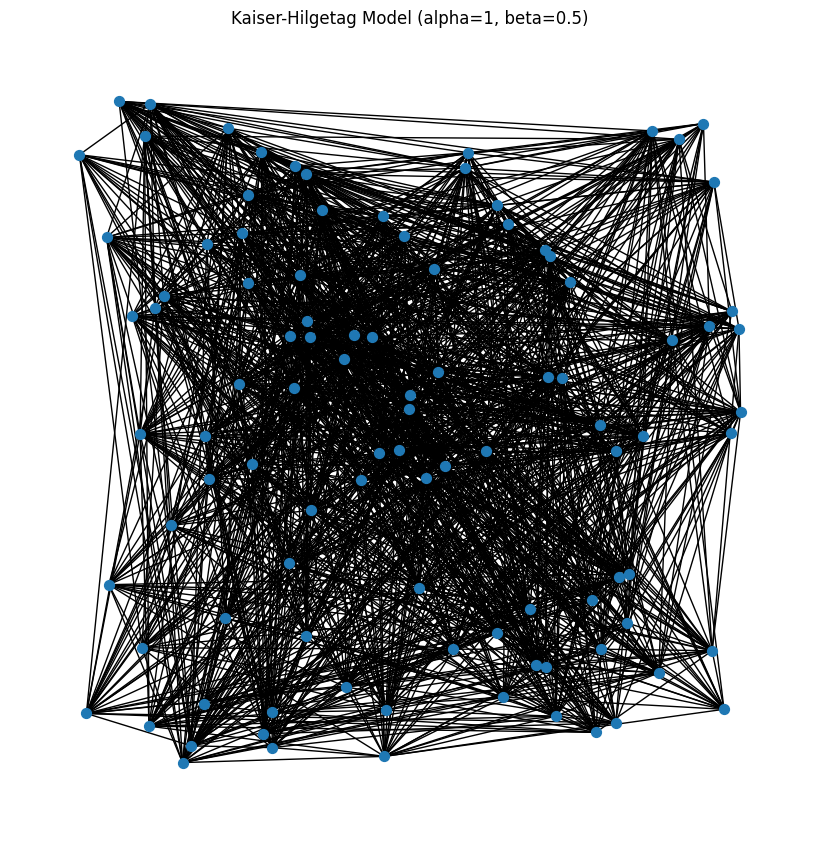

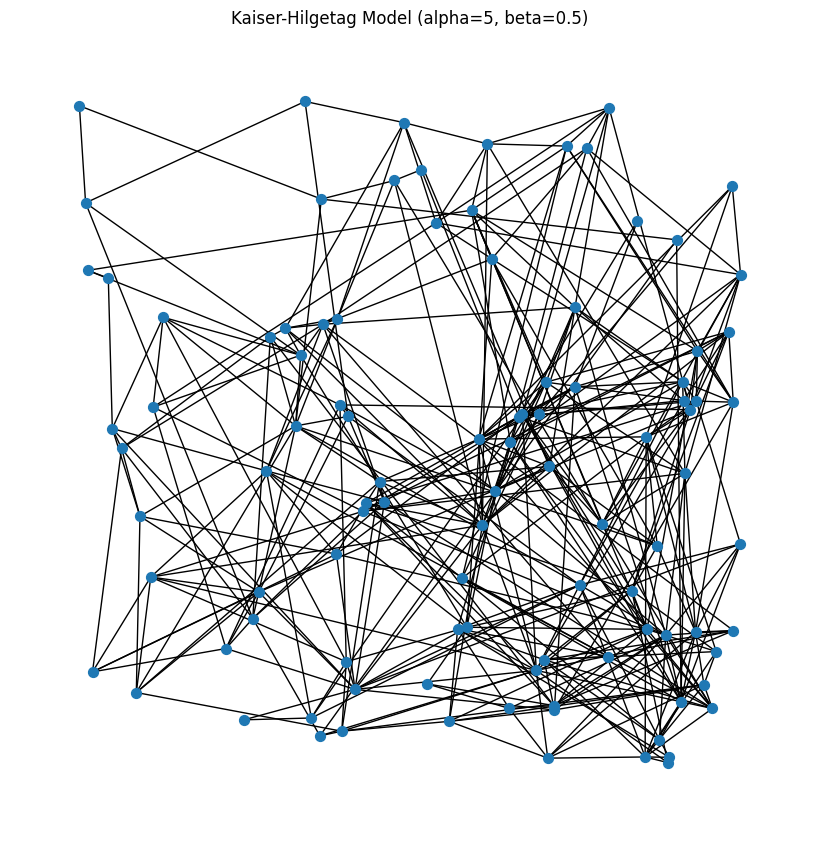

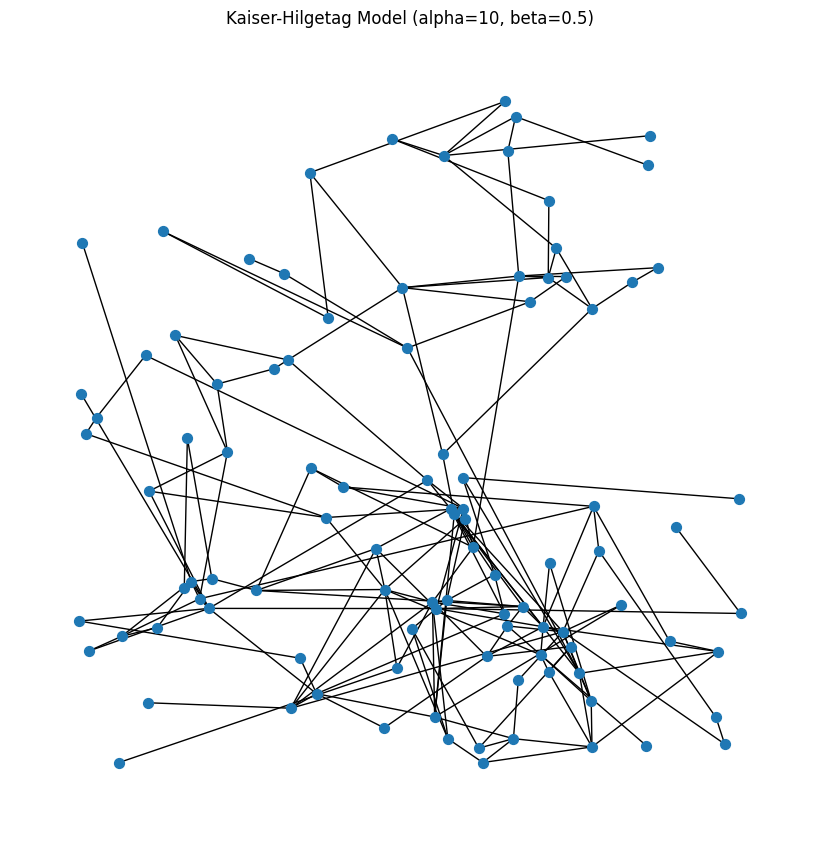

In [ ]:
# TASK 2

results = [
    KaiserHilgetag(alpha=1, beta=0.5, N=100),
    KaiserHilgetag(alpha=5, beta=0.5, N=100),
    KaiserHilgetag(alpha=10, beta=0.5, N=100)
]

# create a networkx graph from the adjacency matrix and plot it
for i, (adjacency, positions) in enumerate(results):
    G = nx.from_numpy_array(adjacency)
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos={j: positions[j] for j in range(len(positions))}, node_size=50, with_labels=False)
    plt.title(f'Kaiser-Hilgetag Model (alpha={ [1,5,10][i] }, beta=0.5)')
    plt.show()


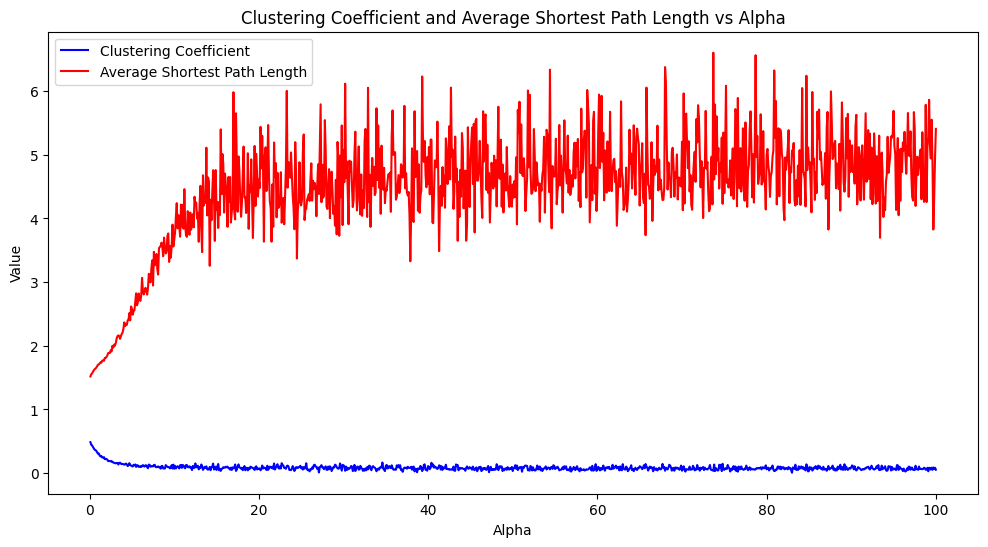

In [ ]:
cluster_coefficients = []
average_shortest_paths = []
alphas = np.linspace(0.1, 100, 1000)

for i, alpha in enumerate(alphas):
    print(f'Calculating for alpha {i+1}/{len(alphas)}', end='\r')
    adjacency, _ = KaiserHilgetag(alpha=alpha, beta=0.5, N=100)
    G = nx.from_numpy_array(adjacency)
    cluster_coefficients.append(nx.average_clustering(G))
    
    average_shortest_paths.append(nx.average_shortest_path_length(G))

# create a plot where on the x-axis is alpha and on the y-axis are the cluster coefficient and average shortest path length - all in the same plot with different colors
plt.figure(figsize=(12, 6))
plt.plot(alphas, cluster_coefficients, label='Clustering Coefficient', color='blue')
plt.plot(alphas, average_shortest_paths, label='Average Shortest Path Length', color='red')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Clustering Coefficient and Average Shortest Path Length vs Alpha')
plt.legend()
plt.show()


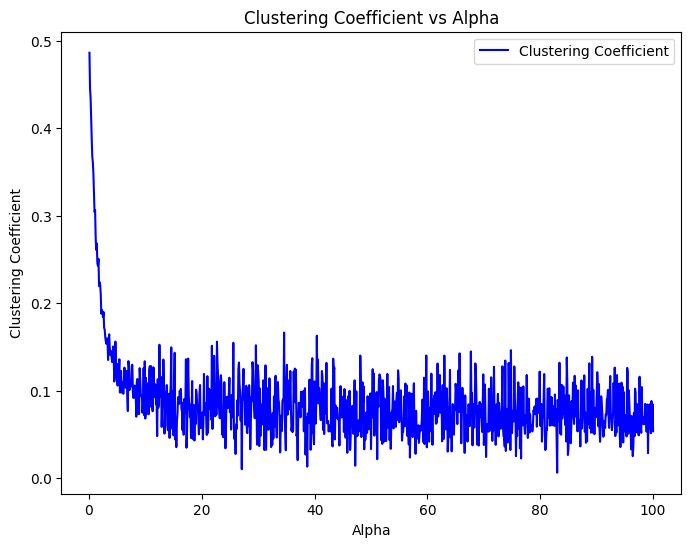

In [12]:
aa = np.array(cluster_coefficients)

# plot only cluster coefs against alphas
plt.figure(figsize=(8, 6))
plt.plot(alphas, cluster_coefficients, label='Clustering Coefficient', color='blue')
plt.xlabel('Alpha')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient vs Alpha')
plt.legend()
plt.show()


In [15]:

# run this code 10 times, always save ads and poss an time it took for the algorithm to run
import time

adjs = []
poss_list = []
times = []

for i in range(20):
    start_time = time.time()
    adj, poss = KaiserHilgetag(alpha=100, beta=0.5, N=100)
    end_time = time.time()
    print(f"Run {i+1} took {end_time - start_time} seconds")
    adjs.append(adj)
    poss_list.append(poss)
    times.append(end_time - start_time)
    # G = nx.from_numpy_array(adj)
    # plt.figure(figsize=(8, 8))
    # nx.draw(G, pos={j: poss[j] for j in range(len(poss))}, node_size=50, with_labels=False)
    # plt.show()

Run 1 took 2.3624861240386963 seconds
Run 2 took 1.7445921897888184 seconds
Run 3 took 1.653092861175537 seconds
Run 4 took 1.9863917827606201 seconds
Run 5 took 1.9276726245880127 seconds
Run 6 took 1.7865753173828125 seconds
Run 7 took 1.7031512260437012 seconds
Run 8 took 1.8438589572906494 seconds
Run 9 took 1.7946369647979736 seconds
Run 10 took 2.0314464569091797 seconds
Run 11 took 1.3386993408203125 seconds
Run 12 took 2.0364341735839844 seconds
Run 13 took 2.103869676589966 seconds
Run 14 took 1.5825047492980957 seconds
Run 15 took 1.860213279724121 seconds
Run 16 took 1.91013503074646 seconds
Run 17 took 2.6942644119262695 seconds


KeyboardInterrupt: 

In [23]:
adj, poss = KaiserHilgetag(alpha=100, beta=0.5, N=100)
np.sum(adj)

308.0